<a href="https://colab.research.google.com/github/Aishwaryap015/IVP-Notebooks/blob/main/IVP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🖼️ Spatial Filtering - Sharpening
**Author:** Aishwarya Priydarshni  

In this notebook, we apply **edge enhancement filters** to an image using **Python + OpenCV**.  
We implement:  
- Laplacian Filter  
- High-Pass Filter  

The goal is to enhance edges and details in the image.  

---


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


Saving istockphotojpg to istockphotojpg


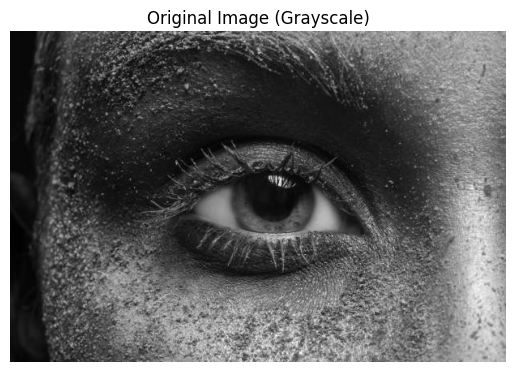

In [2]:
# Upload image from local machine
uploaded = files.upload()

# Read the uploaded image
for fn in uploaded.keys():
    img = cv2.imread(fn)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')
plt.title("Original Image (Grayscale)")
plt.axis("off")
plt.show()


✅ Step 3 Completed: Laplacian Filter Applied


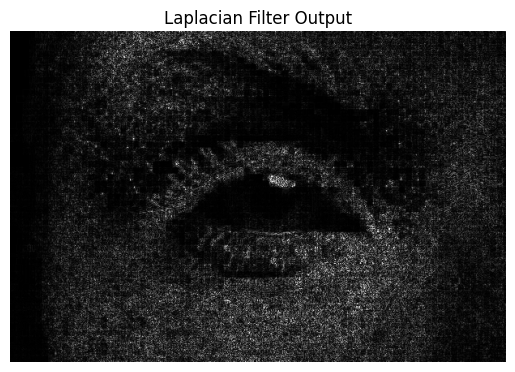

In [3]:
# Apply Laplacian filter to detect edges
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)

print("✅ Step 3 Completed: Laplacian Filter Applied")
plt.imshow(laplacian_abs, cmap='gray')
plt.title("Laplacian Filter Output")
plt.axis("off")
plt.show()


✅ Step 4 Completed: High-Pass Filter Applied


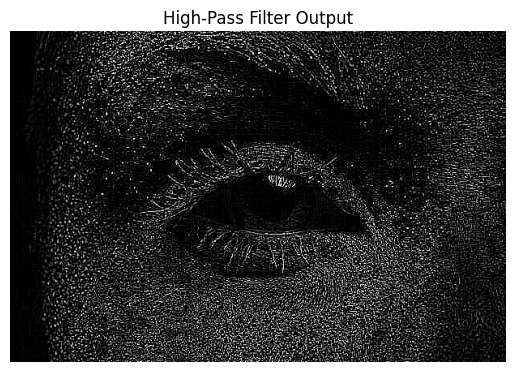

In [4]:
# Create High-Pass Filter Kernel
kernel_hp = np.array([[-1,-1,-1],
                      [-1, 8,-1],
                      [-1,-1,-1]])

# Apply High-Pass Filter using convolution
highpass = cv2.filter2D(img_gray, -1, kernel_hp)

print("✅ Step 4 Completed: High-Pass Filter Applied")
plt.imshow(highpass, cmap='gray')
plt.title("High-Pass Filter Output")
plt.axis("off")
plt.show()


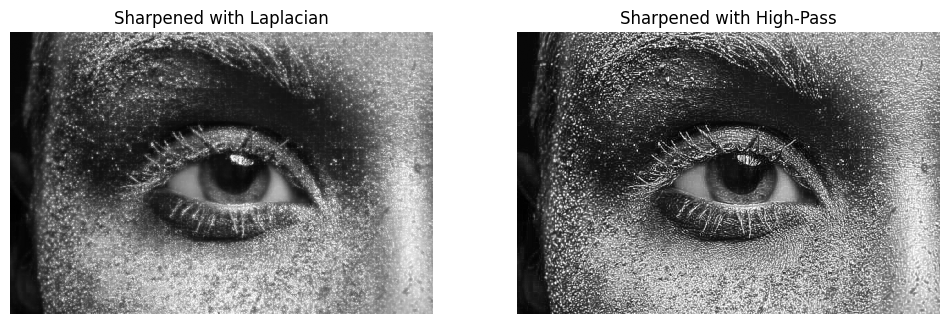

In [5]:
# Sharpen original image using Laplacian
sharpen_laplacian = cv2.addWeighted(img_gray, 1, laplacian_abs, 1, 0)

# Sharpen original image using High-Pass filter
sharpen_hp = cv2.addWeighted(img_gray, 1, highpass, 1, 0)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(sharpen_laplacian, cmap='gray')
plt.title("Sharpened with Laplacian")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sharpen_hp, cmap='gray')
plt.title("Sharpened with High-Pass")
plt.axis("off")
plt.show()


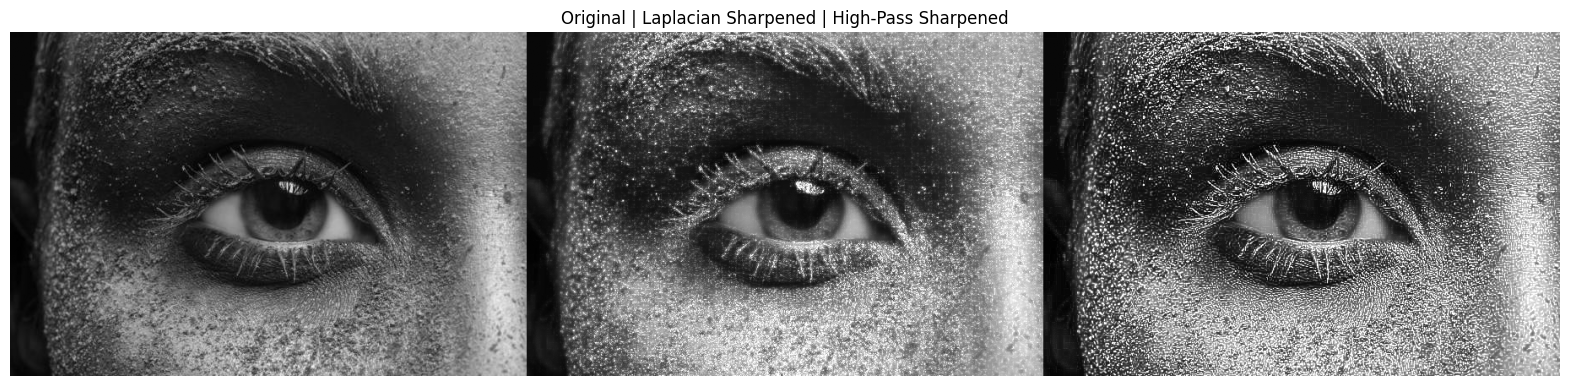

In [6]:
# Before vs After Comparison
comparison = np.hstack((img_gray, sharpen_laplacian, sharpen_hp))
plt.figure(figsize=(20,10))
plt.imshow(comparison, cmap='gray')
plt.title("Original | Laplacian Sharpened | High-Pass Sharpened")
plt.axis("off")
plt.show()


In [ ]:
cv2.imwrite("sharpen_laplacian.png", sharpen_laplacian)
cv2.imwrite("sharpen_highpass.png", sharpen_hp)

files.download("sharpen_laplacian.png")
files.download("sharpen_highpass.png")

print("✅ Step 7 Completed: Sharpened images saved and ready for download")


In [7]:
# Functions to compute MSE and PSNR
def mse(img1, img2):
    return np.mean((img1.astype("float") - img2.astype("float")) ** 2)

def psnr(img1, img2):
    mse_val = mse(img1, img2)
    if mse_val == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse_val))

# Compute MSE and PSNR for Laplacian and High-Pass sharpened images
mse_lap = mse(img_gray, sharpen_laplacian)
psnr_lap = psnr(img_gray, sharpen_laplacian)

mse_hp = mse(img_gray, sharpen_hp)
psnr_hp = psnr(img_gray, sharpen_hp)

print("✅ Step 8 Completed: Quantitative Analysis")
print(f"MSE (Laplacian Sharpened vs Original): {mse_lap:.2f}")
print(f"PSNR (Laplacian Sharpened vs Original): {psnr_lap:.2f} dB")
print(f"MSE (High-Pass Sharpened vs Original): {mse_hp:.2f}")
print(f"PSNR (High-Pass Sharpened vs Original): {psnr_hp:.2f} dB")

# Optional: Edge intensity comparison using Sobel operator
sobel_original = cv2.Sobel(img_gray, cv2.CV_64F, 1, 1, ksize=3)
sobel_lap = cv2.Sobel(sharpen_laplacian, cv2.CV_64F, 1, 1, ksize=3)
sobel_hp = cv2.Sobel(sharpen_hp, cv2.CV_64F, 1, 1, ksize=3)

edge_intensity = {
    "Original": np.mean(np.abs(sobel_original)),
    "Laplacian Sharpened": np.mean(np.abs(sobel_lap)),
    "High-Pass Sharpened": np.mean(np.abs(sobel_hp))
}

import pandas as pd
pd.DataFrame(list(edge_intensity.items()), columns=["Image", "Mean Edge Intensity"])


✅ Step 8 Completed: Quantitative Analysis
MSE (Laplacian Sharpened vs Original): 1292.89
PSNR (Laplacian Sharpened vs Original): 17.02 dB
MSE (High-Pass Sharpened vs Original): 2003.93
PSNR (High-Pass Sharpened vs Original): 15.11 dB


,Image,Mean Edge Intensity
0,Original,19.186339
1,Laplacian Sharpened,32.598320
2,High-Pass Sharpened,67.400247
